# The Nurse Scheduling Problem


Imagine you are responsible for scheduling the shifts for the nurses in your hospital
department for this week. There are three shifts in a day – morning, afternoon, and night –
and for each shift, you need to assign one or more of the eight nurses that work in your
department. If this sounds like a simple task, take a look at the list of relevant hospital
rules:
- A nurse is not allowed to work two consecutive shifts.
- A nurse is not allowed to work more than five shifts per week.

The number of nurses per shift in your department should fall within the following limits:
- Morning shift: 2–3 nurses
- Afternoon shift: 2–4 nurses
- Night shift: 1–2 nurses

- In addition, each nurse can have shift preferences. For example, one nurse prefers to only
work morning shifts, another nurse prefers to not work afternoon shifts, and so on.
This task is an example of the nurse scheduling problem (NSP), which can have many
variants. Possible variations may include different specialties for different nurses, the
ability to work on cover shifts (overtime), or even different types of shifts – such as 8-hour
shifts and 12-hour shifts.
- By now, it probably looks like a good idea to write a program that will do the scheduling
for you. Why not apply our knowledge of genetic algorithms to implement such a
program? As usual, we will start by representing the solution to the problem





## Create The Nurse Scheduling Problem


Create a class called NurseSchedulingProblem that will represent the nurse scheduling problem with the following methods:

- `__init__(self, penality)`: Initializes the class with the given hardConstraintPenalty value. This value will be used to calculate the total cost of the violations in the schedule.

- The class uses the following method to convert the given schedule into a dictionary with a
separate schedule for each nurse:
  - getNurseShifts(schedule)

The following methods are used to count the various types of violations:

- countConsecutiveShiftViolations(nurseShiftsDict)
- countShiftsPerWeekViolations(nurseShiftsDict)
- countNursesPerShiftViolations(nurseShiftsDict)
- countShiftPreferenceViolations(nurseShiftsDict)


- `getCost(schedule)`: Calculates the total cost of the various violations in the given schedule. This method uses the value of the hardConstraintPenalty variable.
- `printScheduleInfo(schedule)`: Prints the schedule and violations details.



Should allow the following sample implementation
```python
nurses = NurseSchedulingProblem(10)

randomSolution = np.random.randint(2, size=len(nurses))
print("Random Solution = ")
print(randomSolution)
print()

nurses.printScheduleInfo(randomSolution)

print("Total Cost = ", nurses.getCost(randomSolution))

```

```
Schedule for each nurse:
A : [0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0]
B : [0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0]
C : [0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0]
D : [0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0]
E : [1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]
F : [1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
G : [0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1]
H : [1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0]
consecutive shift violations =  39

weekly Shifts =  [12, 8, 9, 10, 8, 15, 10, 7]
Shifts Per Week Violations =  39

Nurses Per Shift =  [3, 5, 4, 5, 3, 3, 5, 3, 3, 4, 3, 3, 5, 3, 3, 4, 3, 4, 5, 5, 3]
Nurses Per Shift Violations =  21

Shift Preference Violations =  30

Total Cost =  1020
```

### Bas Code


In [1]:
import numpy as np


class NurseSchedulingProblem:
    """This class encapsulates the Nurse Scheduling problem
    """

    def __init__(self, hardConstraintPenalty):
        """
        :param hardConstraintPenalty: the penalty factor for a hard-constraint violation
        """
        self.hardConstraintPenalty = hardConstraintPenalty

        # list of nurses:
        self.nurses = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

        # nurses' respective shift preferences - morning, evening, night:
        self.shiftPreference = [[1, 0, 0], [1, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 1, 1], [1, 1, 1]]

        # min and max number of nurses allowed for each shift - morning, evening, night:
        self.shiftMin = [2, 2, 1]
        self.shiftMax = [3, 4, 2]

        # max shifts per week allowed for each nurse
        self.maxShiftsPerWeek = 5

        # number of weeks we create a schedule for:
        self.weeks = 1

        # useful values:
        self.shiftPerDay = len(self.shiftMin)
        self.shiftsPerWeek = 7 * self.shiftPerDay

    def __len__(self):
        """
        :return: the number of shifts in the schedule
        Used to generate the size of the individual array representation.
        """
        return len(self.nurses) * self.shiftsPerWeek * self.weeks


    def getCost(self, schedule):
        """
        Calculates the total cost of the various violations in the given schedule
        ...
        :param schedule: a list of binary values describing the given schedule
        :return: the calculated cost
        """

        if len(schedule) != self.__len__():
            raise ValueError("size of schedule list should be equal to ", self.__len__())

        # convert entire schedule into a dictionary with a separate schedule for each nurse:
        nurseShiftsDict = self.getNurseShifts(schedule)

        # count the various violations:
        consecutiveShiftViolations = self.countConsecutiveShiftViolations(nurseShiftsDict)
        shiftsPerWeekViolations = self.countShiftsPerWeekViolations(nurseShiftsDict)[1]
        nursesPerShiftViolations = self.countNursesPerShiftViolations(nurseShiftsDict)[1]
        shiftPreferenceViolations = self.countShiftPreferenceViolations(nurseShiftsDict)

        # calculate the cost of the violations:
        hardContstraintViolations = consecutiveShiftViolations + nursesPerShiftViolations + shiftsPerWeekViolations
        softContstraintViolations = shiftPreferenceViolations

        return self.hardConstraintPenalty * hardContstraintViolations + softContstraintViolations

    def getNurseShifts(self, schedule) -> dict[str: list[int]]:
        """
        Converts the entire schedule into a dictionary with a separate schedule for each nurse
        :param schedule: a list of binary values describing the given schedule
        :return: a dictionary with each nurse as a key and the corresponding shifts as the value
        """
        shiftsPerNurse = self.__len__() // len(self.nurses)
        nurseShiftsDict = {}
        shiftIndex = 0

        for nurse in self.nurses:
            nurseShiftsDict[nurse] = schedule[shiftIndex:shiftIndex + shiftsPerNurse]
            shiftIndex += shiftsPerNurse

        return nurseShiftsDict

    def countConsecutiveShiftViolations(self, nurseShiftsDict) -> int:
        """
        Counts the consecutive shift violations in the schedule
        :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
        :return: count of violations found
        """
        violations = 0
        # TODO iterate over the shifts of each nurse:
        
        return violations

    def countShiftsPerWeekViolations(self, nurseShiftsDict) -> set[int:int]:
        """
        Counts the max-shifts-per-week violations in the schedule
        :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
        :return: count of violations found
        """
        violations = 0
        weeklyShiftsList = []
        # TODO iterate over the shifts of each nurse:

        return weeklyShiftsList, violations

    def countNursesPerShiftViolations(self, nurseShiftsDict) -> set[int:int]:
        """
        Counts the number-of-nurses-per-shift violations in the schedule
        :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
        :return: count of violations found
        """
        # sum the shifts over all nurses:
        totalPerShiftList = [sum(shift) for shift in zip(*nurseShiftsDict.values())]

        violations = 0
        # TODO iterate over all shifts and count violations:

        return totalPerShiftList, violations

    def countShiftPreferenceViolations(self, nurseShiftsDict) -> int:
        """
        Counts the nurse-preferences violations in the schedule
        :param nurseShiftsDict: a dictionary with a separate schedule for each nurse
        :return: count of violations found
        """
        violations = 0
        # TOOD Complete
        
        return violations

    def printScheduleInfo(self, schedule):
        """
        Prints the schedule and violations details
        :param schedule: a list of binary values describing the given schedule
        """
        pass

In [2]:
nurses = NurseSchedulingProblem(10)

randomSolution = np.random.randint(2, size=len(nurses))
print("Random Solution = ")
print(randomSolution)
print()

nurses.printScheduleInfo(randomSolution)

print("Total Cost = ", nurses.getCost(randomSolution))


Random Solution = 
[1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]

Schedule for each nurse:
A : [1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1]
B : [1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0]
C : [0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0]
D : [1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0]
E : [1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1]
F : [0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1]
G : [0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0]
H : [1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
consecutive shift violations =  35

weekly Shifts =  [12, 10, 12, 12, 11, 7, 7, 10]
Shifts Per Week Violations =  41

Nurses Per Shift =  [5, 4, 4, 2, 4, 1, 2, 6, 5, 5, 4, 1, 4, 5, 2, 6, 3, 5, 4, 6, 3]
Nurses Per Shift Violations

## Implement the Genetic Algorithm Solution




### Base Code

```python

from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

# problem constants:
# the penalty factor for a hard-constraint violation

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# TODO Complete the operators below.

# create the nurse scheduling problem instance to be used:


# define a single objective, maximizing fitness strategy:

# create the Individual class based on list:

# create an operator that randomly returns 0 or 1:

# create the individual operator to fill up an Individual instance:

# create the population operator to generate a list of individuals:


# fitness calculation
def getCost(individual):
    #TODO Complete


toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(nsp))

## TODO Complete the code below
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# TODO prepare the statistics object: define Statistics Fitness values +  (min, avg)


# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# TODO print best solution found:


# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# TODO plot statistics:


```

### Solution

In [3]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

# problem constants:
HARD_CONSTRAINT_PENALTY = 10  # the penalty factor for a hard-constraint violation

# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 200
HALL_OF_FAME_SIZE = 30

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create the nurse scheduling problem instance to be used:
nsp = NurseSchedulingProblem(HARD_CONSTRAINT_PENALTY)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(nsp))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def getCost(individual):
    return nsp.getCost(individual),  # return a tuple


toolbox.register("evaluate", getCost)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(nsp))



c:\Users\NelsonWang\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\NelsonWang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\NelsonWang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


gen	nevals	min	avg    
0  	300   	689	1158.77
1  	245   	689	1028.02
2  	239   	538	909.587
3  	229   	489	803.7  
4  	247   	445	729.993
5  	239   	342	667.38 
6  	250   	342	597.19 
7  	252   	272	532.763
8  	249   	264	465.397
9  	250   	224	411.48 
10 	245   	217	357.667
11 	255   	134	317.667
12 	246   	134	280.203
13 	237   	103	251.517
14 	248   	103	229.01 
15 	249   	103	203.493
16 	248   	103	183.67 
17 	248   	95 	169.177
18 	240   	86 	152.1  
19 	240   	74 	139.787
20 	246   	73 	121.847
21 	242   	63 	109.88 
22 	245   	63 	103.863
23 	239   	52 	98.3333
24 	238   	52 	91.6767
25 	248   	31 	85.5867
26 	245   	31 	78.7767
27 	248   	31 	73.26  
28 	241   	31 	70.0667
29 	233   	31 	64.95  
30 	242   	31 	60.83  
31 	257   	30 	57.6833
32 	247   	29 	52.62  
33 	248   	21 	48.8367
34 	241   	19 	46.5733
35 	247   	16 	43.5   
36 	251   	14 	41.1533
37 	249   	14 	38.84  
38 	252   	13 	35.44  
39 	253   	13 	33.3367
40 	255   	13 	32.13  
41 	254   	12 	31.07  
42 	243   	

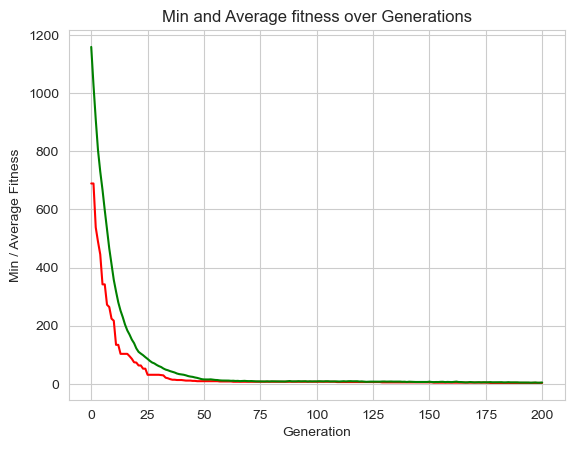

In [4]:

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", numpy.min)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("-- Schedule = ")
nsp.printScheduleInfo(best)

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
plt.show()

